> Q3  ※ 정답은 반올림하여 소수점 둘째 자리까지 출력하시오.   <- 삭제

갓 입사한 신입사원 김모씨는 기획 부서에 배치되었다. 첫 프로젝트로 신규 스마트폰 스팩 기획 업무를 보조하게 되었다. 장고 끝에 김씨는 온라인 디지털 마켓 사이트 "디판다요"에서 판매중인 스마트폰 데이터를 수집하여 이를 분석하고 향후 프로젝트의 백데이터로 활용하기로 결심하였다.

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

import pandas as pd
df_origin = pd.read_csv("../Datasets/mobiles.csv")
df_origin.head(2)

screen_size  ROM  RAM  num_rear_camera  num_front_camera  battery_capacity  \
0  Very Small   64    2                1                 1              1800   
1       Small   64    4                2                 1              2815   

   ratings  num_of_ratings  sales_price  discount_percent   sales  
0      4.5           38645        32999              0.17  127.52  
1      4.5             244        57149              0.04    1.39

### Q1. 스마트폰의 경우 많은 제품이 출시되지만 정작 주목받는 제품은 극히 적다고 한다. 판매 지수(sales)를 기준으로 이상치라고 판단되는 제품을 주목받는 제품이라고 판단하고 해당 제품들의 성능지표를 산출하시오. 산출된 성능지표의 평균은 얼마인가?

<성능지표 계산식>
$$성능지표 = \frac{ROM}{32} + \frac{RAM}{2} + 카메라 개수 + \frac{배터리 용량}{1000}$$

※ 카메라 개수  : num_rear_camera + num_front_camera  
※ 이상치는 평균으로 부터 2 표준편차보다 큰 값으로 정의한다.  
※ 결과는 반올림하여 소수점 둘째 자리까지 계산하시오.  
(정답 예시: 0.12) 

In [53]:
df1 = df_origin.copy()

---

판매 지수(sales)를 기준으로 이상치  
※ 이상치는 평균으로 부터 2 표준편차보다 큰 값으로 정의한다.  

Q. sales 어떻게 생겼길래 아웃라이어 처리하라는 거지?

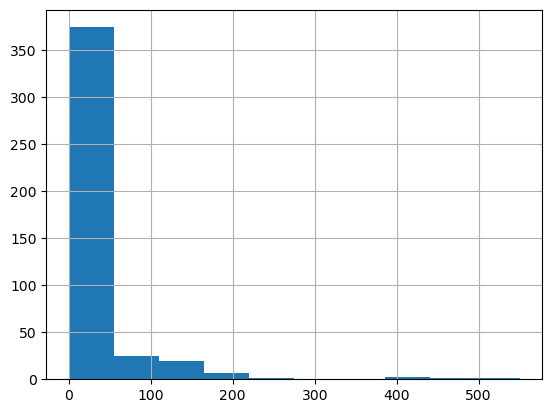

In [54]:
df1['sales'].hist();

> 400 이상인 애들이 보이네

In [55]:
stat_outlier=df1['sales'].mean() +  df1['sales'].std()*2
stat_outlier

146.55150129273218

이상치라고 판단되는 제품을 주목받는 제품이라고 판단하고 해당 제품들의 성능지표

In [56]:
df1=df1[df1['sales']>stat_outlier]
# df1=df1.loc[df1['sales']>stat_outlier]

성능지표  
<성능지표 계산식>
$$성능지표 = \frac{ROM}{32} + \frac{RAM}{2} + 카메라 개수 + \frac{배터리 용량}{1000}$$
 
※ 카메라 개수  : num_rear_camera + num_front_camera  


In [58]:
performance_indicator = (df1["ROM"] / 32) + (df1["RAM"] / 2) \
                + df1["num_front_camera"] + df1["num_rear_camera"] \
                + (df1["battery_capacity"] / 1000)

※ 결과는 반올림하여 소수점 둘째 자리까지 계산하시오.  

In [59]:
performance_indicator

98     14.00
110    17.50
158    10.00
159    10.00
193     8.50
198     9.00
243     8.50
381    12.00
382    12.00
395     8.60
396    10.00
402    11.00
404    12.00
407    12.00
412    11.00
418    10.08
dtype: float64

In [60]:
performance_indicator.mean().round(2)

11.01

### Q2. 판매 지수와 가장 상관관계가 높은 변수를 찾고자 한다. 배터리 용량, 평가 점수 평균, 평가 개수, 판매 가격, 할인율 변수와 판매 지수를 피어슨 상관분석을 실시하였을 때 상관계수의 절대값이 가장 큰 변수의 상관계수는 얼마인가?
※ 후면 카메라가 1개인 제품은 제외하시오.  
※ 통계적 유의성은 고려하지 않음  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [61]:
df2 = df_origin.copy()

※ 후면 카메라가 1개인 제품은 제외하시오.  

In [63]:
df2=df2[df2.num_rear_camera!=1]

판매 지수와 가장 상관관계가 높은 변수
배터리 용량, 평가 점수 평균, 평가 개수, 판매 가격, 할인율 변수와 판매 지수 중

절대값 가장 큰 거

※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  

In [64]:
df2.columns

Index(['screen_size', 'ROM', 'RAM', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [66]:
df2=df2.loc[:, 'battery_capacity':]

In [71]:
df2.corr()['sales'][:-1].abs().round(2).max()

0.95

### Q3. 판매지수를 예측하기 위해 머신러닝 모델을 활용하고자 한다. k-NN 알고리즘을 사용하고 연산에 사용하는 이웃의 개수를 변화하면서 가장 성능이 좋은 모델을 확보하려 한다. RMSE(Root Mean Squared Error)를 기준으로 가장 성능이 좋은 모델의 군집개수 k를 구하라

<독립 변수>
- 판매 지수를 제외한 모든 변수

<종속변수>
 - 판매 지수

※ 명목형 독립변수의 경우 One Hot Encoding을 실시한 결과를 모델에 사용하시오.  
※ 학습에 사용하는 독립변수의 개수는 총 14개 이다.  
※ 학습 및 평가 데이터 세트 분할비는 8:2으로 하시오.  
※ 정규화는 Min-Max 정규화를 실시하며 평가 데이터 세트는 학습 데이터 세트 기반으로 정규화 하시오.  
※ seed는 123으로 고정하시오.  
※ 최근접 이웃은 3, 5, 7, 9, 11개를 사용하시오.  
(정답 예시: 9)

In [74]:
df3= df_origin.copy()

※ seed는 123으로 고정하시오.  

In [75]:
seed = 123

※ 학습 및 평가 데이터 세트 분할비는 8:2으로 하시오.  

In [76]:
X=df3.drop(columns='sales').copy()
y=df3['sales'].copy()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

※ 정규화는 Min-Max 정규화를 실시하며 평가 데이터 세트는 학습 데이터 세트 기반으로 정규화 하시오.  

In [84]:
col_cate = X_train.select_dtypes(include='object').columns
col_num = X_train.select_dtypes(include='number').columns

In [85]:
scaler_mm=MinMaxScaler()

In [86]:
X_train_num = scaler_mm.fit_transform(X_train[col_num])
X_test_num = scaler_mm.transform(X_test[col_num])

In [87]:
# y도 스케일링 해도 괜찮다 어차피 모델 간 성능 비교를 rmse로 성능판단을 할 거니깐 
# X_test_num = scaler_mm.transform(pd.concat([X_test[col_num], y_test], axis=1))
# y_test_minmax=X_test_num[:,-1]
# X_test_num=X_test_num[:,:-1]

※ 명목형 독립변수의 경우 One Hot Encoding을 실시한 결과를 모델에 사용하시오.  

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=True)
# `sparse` is deprecated in 1.2 and will be removed in 1.4

> 지금은 테스트셋이 하나의 데이터셋에서 나눴는데 만약 테스트셋을 따로 제공했을 때 테스트셋의 범주형 컬럼개수가 더 많다면 판다스 겟더미함수는 오류발생

In [93]:
X_train_cate = ohe.fit_transform(X_train[col_cate])
X_test_cate = ohe.transform(X_test[col_cate])

In [112]:
X_train_cate

<344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 344 stored elements in Compressed Sparse Row format>

> 희소행렬(Sparse Matrix, 0이 너무 많은 행렬)을 Dense Matrix(우리가 일반적으로 보고 있는 테이블형태)하게 저장할 필요없이 메모리 효율적으로 숫자가 있는 위치만 저장함)

> 지금은 카테고리가 컬럼하나 밖에 없고 그 컬럼의 유니크 범주가 몇 개 없어서 사용할 필요는 없긴하지만 알아둬야하는 개념.

In [116]:
X_train_cate.indptr, X_train_cate.indices,X_train_cate.data

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

> sparse 읽어보고 싶으면 참고할 사이트, https://rfriend.tistory.com/551

※ 학습에 사용하는 독립변수의 개수는 총 14개 이다.  

In [28]:
num_depend = X_train_cate.shape[1]+X_train_num.shape[1]

In [95]:
num_depend == 14

True

- 데이터 합치기

In [30]:
from scipy import sparse

In [96]:
X_train=sparse.hstack([X_train_cate, X_train_num])
X_test=sparse.hstack([X_test_cate, X_test_num])

※ 최근접 이웃은 3, 5, 7, 9, 11개를 사용하시오.  

In [97]:
k_values = [3,5,7,9,11]

RMSE(Root Mean Squared Error)를 기준 k를 구하라

- 3으로 일단 테스트 보여드릴게요

In [98]:
model_knnr=KNeighborsRegressor(n_neighbors=k_values[0])

In [99]:
model_knnr.fit(X=X_train,y=y_train)

KNeighborsRegressor(n_neighbors=3)

Q. 모델이 일반적인으로 말하는 학습을 했을까요? 안했을까요?

> A. KNN은 instance based model! test들어오기 전까지 대기! lazy learner!

In [100]:
y_pred = model_knnr.predict(X_test)

In [101]:
mean_squared_error(y_test,y_pred)

1635.4379954780363

- 반복문 잠깐

In [102]:
for k in k_values:
    print(k)

3
5
7
9
11


In [103]:
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    print(model_knnr.n_neighbors)

3
5
7
9
11


In [104]:
scores = {}
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    model_knnr.fit(X_train,y_train)
    y_pred=model_knnr.predict(X_test)
    scores[k] = mean_squared_error(y_test, y_pred)

In [105]:
scores

{3: 1635.4379954780363,
 5: 2381.520687627907,
 7: 2828.8309384907457,
 9: 3078.5168532443304,
 11: 3154.0245733999623}

Q. 딕셔너리 정렬하시오

In [106]:
sorted(scores.items(), key=lambda x:x[1])[0]
# sorted(scores.items(), key=lambda x:x[1], reverse=True)

(3, 1635.4379954780363)

In [107]:
pd.DataFrame(index=scores.keys(), data=scores.values(), columns=['MSE']).sort_values(by='MSE').idxmin()

MSE    3
dtype: int64

---

- train과 test가 하나의 데이터셋에서 분리할 경우, k값을 구한다고 하면 문제 빨리 풀기

In [108]:
df_dum=pd.get_dummies(df3)

In [109]:
y=df_dum['sales']
X=df_dum.drop(columns='sales').copy()

In [110]:
scores = {}
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    model_knnr.fit(X,y)
    y_pred=model_knnr.predict(X)
    scores[k]=mean_squared_error(y, y_pred)
scores

{3: 104.86329534883724,
 5: 215.63105646511625,
 7: 353.60899590412913,
 9: 468.67858230261265,
 11: 562.001371330002}

In [111]:
sorted(scores.items(),  key=lambda x:x[1])[0]

(3, 104.86329534883724)